In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [11]:
import warnings
from sklearn.exceptions import DataConversionWarning
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=[FutureWarning,RuntimeWarning])
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [12]:
raw_data = pd.read_csv("corn_data.csv")
raw_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,output
0,0,1,-1,1,1,1,0,1,-1,1,...,-1,1,-1,1,1,-1,0,0,-1,2.516485
1,1,1,-1,1,1,-1,-1,1,-1,1,...,-1,1,-1,0,1,-1,-1,1,0,1.640909
2,2,0,1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,0,0.416348
3,3,1,1,1,0,-1,1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,1,0,1.338558
4,4,1,1,1,0,-1,-1,1,0,1,...,-1,1,-1,0,-1,-1,1,1,0,1.729517


In [13]:
X = raw_data.iloc[:,1:-1]
y = raw_data.iloc[:,-1:]
total_count = len(y)
print("min:",min(np.array(y))[0],"max:",max(np.array(y))[0],"Total:",total_count)


min: 0.0117532464005208 max: 4.9270454514617015 Total: 264


### Visualize Our Data

<IPython.core.display.Javascript object>


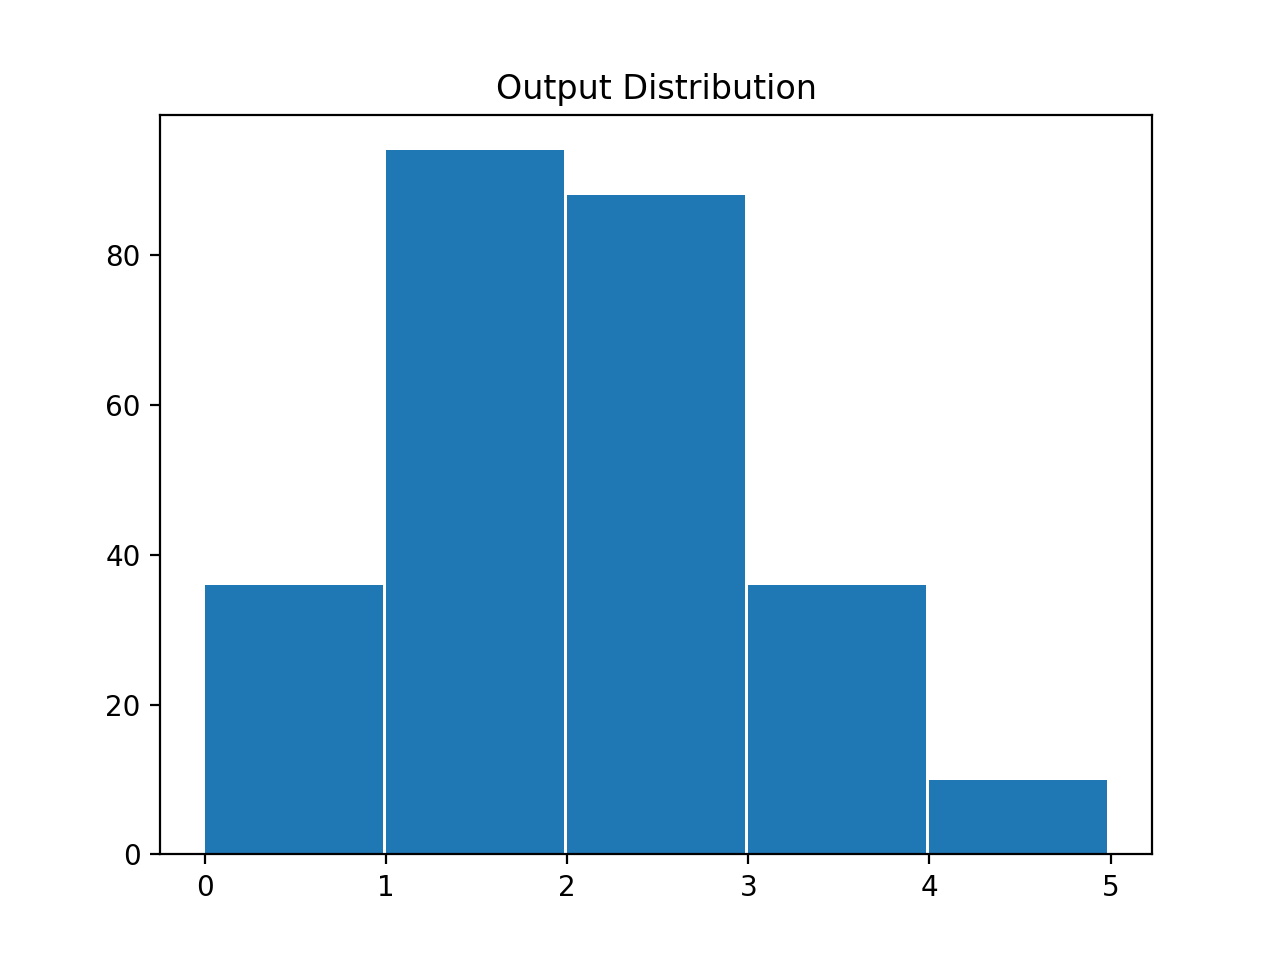

In [14]:
hist, bin_edges = np.histogram(y, bins=5, range=(0,5))
fig = plt.figure()
plt.bar( bin_edges[:-1],hist, width=.98,align="edge")
plt.title("Output Distribution")
plt.show()


### Stratify the Data
Added on May 27, 2020
    
    
    

#### Take this simple step to stratify our data...

In [15]:
y_stf = np.array(y,dtype="int")
y_stf[:15].T #print out the first 15 elements for visualization purposes

array([[2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2]])

In [16]:
import sklearn.model_selection.train_test_split  


AttributeError: type object 'scipy.interpolate._bspl.array' has no attribute '__reduce_cython__'

In [9]:

split = 0.25
#Without Stratification
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split,random_state=1)
hist_tr, bin_edges_tr = np.histogram(y_train, bins=5, range=(0,5))
hist_test, bin_edges_test = np.histogram(y_test, bins=5, range=(0,5))
fig,ax = plt.subplots()
ax.bar( bin_edges_test[:-1],hist_test, width=.98,align="edge",color="orange",label="Test data")
ax.bar( bin_edges_tr[:-1],hist_tr, width=.98,align="edge",bottom=hist_test,label="Train data")
ax.set_title("Test Split without Stratification")
ax.legend()


#With Stratification
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split,random_state=1,stratify = y_stf)
hist_tr, bin_edges_tr = np.histogram(y_train, bins=5, range=(0,5))
hist_test, bin_edges_test = np.histogram(y_test, bins=5, range=(0,5))
fig,ax = plt.subplots()
ax.bar( bin_edges_test[:-1],hist_test, width=.98,align="edge",color="orange",label="Test data")
ax.bar( bin_edges_tr[:-1],hist_tr, width=.98,align="edge",bottom=hist_test,label="Train data")
ax.set_title("Test Split with Stratification")
ax.legend()
plt.show()

NameError: name 'train_test_split' is not defined

In [ ]:
np.array([abs(x)*0.1 for x in range(-10,11)])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# we use r2 because we are doing regression, not classification

class Scorer:
    def __init__(self,X,y):
        self.scores = {}
        self.X = X
        self.y = y
        self.split = 0.25
        self.stratify = np.array(self.y,dtype="int")
        self.iterations = 20
    
    def set_stratify(self,state):
        if state:
            self.stratify = np.array(self.y,dtype="int")
        else:
            self.stratify = None
        
    def test(self,name,clf,iterations):
        scores = []
        for i in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=self.split,
                                                                random_state=i,stratify=self.stratify)
            clf.fit(X_train,y_train)
            y_predict_tr = clf.predict(X_train)
            y_predict = clf.predict(X_test)    
            scores.append([r2_score(y_train,y_predict_tr),r2_score(y_test,y_predict)])  
        scores = np.array(scores)
        self.scores[name] = [np.mean(scores[:,0]),np.mean(scores[:,1])]

        
    def test_m(self,preds,iterations):
        for predictor in preds:   
            self.test(predictor,pred[predictor],iterations)

    
    def labels(self):
        return [x for x in self.scores]
                        
    def train_scores(self):
        sc = np.array([self.scores[x] for x in self.scores])
        return sc[:,0]
        
    def test_scores(self):
        sc = np.array([self.scores[x] for x in self.scores])
        return sc[:,1]
    

    def find_best_params(self,clf,grid):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=self.split,
                                                        stratify=self.stratify)
        gd_sr = GridSearchCV(estimator=clf,
                               param_grid=grid,
                               scoring='r2', # note the use of scoring here.
                               cv=5, iid=False)
        gd_sr.fit(X_train, y_train)
        return gd_sr.best_params_

    def draw_twscores(self):
        plt.rcdefaults()
        fig, ax = plt.subplots()

        # Example data
        labels = self.labels()
        x_pos = np.array([x*0.1 for x in range(-10,11)])
        y_pos = np.arange(len(labels))
        performance = self.train_scores()
        width = 0.4  # the width of the bars
        # ax.barh(y_pos, performance, align='center')
        rects1 = ax.barh(y_pos, self.train_scores(), width, label='Train Score')
        rects2 = ax.barh(y_pos, -1*self.test_scores(), width, label='Test Score')
        ax.set_yticks(y_pos)
        ax.set_xticks(x_pos)
        ax.set_yticklabels(labels)
        ax.invert_yaxis()  # labels read top-to-bottom
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            
            for rect in rects:
                width = rect.get_width()
                i = 0
                if width < 0:
                    i = abs(width)+45
                elif width < 0.1:
                    i = 30
                ax.annotate('{:.3f}'.format(width),
                            xy=(width, rect.get_y() + rect.get_height() / 2),
                            xytext=(i,0),  # 3 points vertical offset
                            textcoords="offset points",
                            va='center', ha='right')
        autolabel(rects1)
        autolabel(rects2)
        fig = plt.gcf()
#         fig.set_size_inches(6,6) 
        ax.set_xlabel('Performance')
        ax.set_title('R2 Scores by Predictors')
    
    def draw_hscores(self):
        plt.rcdefaults()
        fig, ax = plt.subplots()

        # Example data
        labels = self.labels()
        x_pos = np.linspace(0,1,11)
        y_pos = np.arange(len(labels))
        performance = self.train_scores()
        width = 0.4  # the width of the bars
        # ax.barh(y_pos, performance, align='center')
        rects1 = ax.barh(y_pos - width/2, self.train_scores(), width, label='Train Score')
        rects2 = ax.barh(y_pos + width/2, self.test_scores(), width, label='Test Score')
        ax.set_yticks(y_pos)
        ax.set_xticks(x_pos)
        ax.set_yticklabels(labels)
        ax.invert_yaxis()  # labels read top-to-bottom
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                width = rect.get_width()
                i = 0
                if width < 0:
                    i = abs(width)+45
                elif width < 0.1:
                    i = 30
                ax.annotate('{:.3f}'.format(width),
                            xy=(width, rect.get_y() + rect.get_height() / 2),
                            xytext=(i,0),  # 3 points vertical offset
                            textcoords="offset points",
                            va='center', ha='right')
        autolabel(rects1)
        autolabel(rects2)
        fig = plt.gcf()
#         fig.set_size_inches(6,6) 
        ax.set_xlabel('Performance')
        ax.set_title('R2 Scores by Predictors')
        
    def draw_scores(self):
        if (len(self.labels())>=6):
            self.draw_hscores()
        else:
            x = np.arange(len(self.labels()))  # the label locations
    #         y = np.linspace(0,1,11,endpoint=True)
            width = 0.35  # the width of the bars
            fig, ax = plt.subplots()
            rects1 = ax.bar(x - width/2, self.train_scores(), width, label='Train Score')
            rects2 = ax.bar(x + width/2, self.test_scores(), width, label='Test Score')
            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('R2 Scores')
            ax.set_title('R2 Scores by Predictors')
            ax.set_xticks(x)
    #         ax.set_yticks(y)
            ax.set_xticklabels(self.labels())
            ax.legend()

            def autolabel(rects):
                """Attach a text label above each bar in *rects*, displaying its height."""
                for rect in rects:
                    height = rect.get_height()
                    i = 0
                    if height < 0:
                        i = abs(height)+10
                    ax.annotate('{:.3f}'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 1+i),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')

            autolabel(rects1)
            autolabel(rects2)
            fig = plt.gcf()
#             fig.set_size_inches(7,6)        
            plt.show()
    
    
               
    def plot_graph(y,y_pred,title):
        fig, ax = plt.subplots()
        plt.axis([0,5,0,5])
        ax.set_title(title)
        plt.plot(y,y_pred,'o',color="black")
        plt.plot([x for x in np.arange(0,6)],[x for x in np.arange(0,6)],'r--',)
        plt.show()
    
    def clear_scores(self):
        self.scores = {}

In [ ]:
scorer = Scorer(X,y)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
svr = SVR()
rfr = RandomForestRegressor()

scorer.clear_scores()

scorer.set_stratify(False)

scorer.test("SVR",svr,10)
scorer.test("RFR",rfr,10)
scorer.test("XGBoost",xgb,10)

scorer.set_stratify(True)

scorer.test("SVR_stf",svr,10)
scorer.test("RFR_stf",rfr,10)
scorer.test("XGBoost_stf",xgb,10)

scorer.draw_scores()

### Some intriguing observations:
1. Stratification does seem to help with performance
2. SVR and XGBoost produce the same result when repeated using the same initial condition. RFR produces different result each time


### Use Grid Search to Improve our performance

In [ ]:
best_svr = SVR(
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

SVR_grid = {'kernel':['rbf'],
           'degree':[1],
           'gamma':['scale'],
           'coef0':[-50],
           'tol':[0.01],
           'C':[5],#>0
           'epsilon':[0.1], #>0
           'shrinking':[True],
           'cache_size':[50],
           'verbose':[True],
           'max_iter':[-1]}



b_param = scorer.find_best_params(best_svr,SVR_grid)
b_param

In [ ]:
SVR_grid = {'kernel':['poly', 'rbf', 'sigmoid'],
#            'degree':[1,5,10],
#            'gamma':['scale','auto'],
#            'coef0':[-50,0,100],
#            'tol':[0.01,0.0001],
#            'C':[1,5,10],#>0
#            'epsilon':[0.1,0.001], #>0
#            'shrinking':[True,False],
#            'cache_size':[50,100,200],
#            'verbose':[True],
           'max_iter':[-1]}



scorer.find_best_params(svr,SVR_grid)

In [ ]:
best_svr =  SVR(kernel='rbf',
           degree=1,
           gamma='scale',
           coef0=-50,
           tol=0.01,
           C=5,
           epsilon=0.1,
           shrinking=True,
           cache_size=50,
           verbose=False)
svr = SVR()
scorer.clear_scores()
scorer.set_stratify(False)
scorer.test("SVR_no_stf",svr,15)
scorer.test("Best_SVR_no_stf",best_svr,15)
scorer.set_stratify(True)
scorer.test("SVR",svr,15)
scorer.test("Best_SVR",best_svr,15)
scorer.draw_scores()

### Use SelectKBest 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# do train-test split to get sample to do feature selection
def testKBest(scorer,name,clf,split,iterations,k):
    scores = []
    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(scorer.X,scorer.y,test_size=scorer.split,
                                                            random_state=i,stratify=scorer.stratify)
        X_train_FS, X_FS, y_train_FS, y_FS = train_test_split(X_train,y_train, test_size=split)
        skb = SelectKBest(f_regression, k=k)
        skb.fit(X_FS,y_FS)
        X_train_FS = skb.transform(X_train_FS)
        X_test_FS = skb.transform(X_test)

        
        clf.fit(X_train_FS,y_train_FS)
        y_predict_tr = clf.predict(X_train_FS)
        y_predict = clf.predict(X_test_FS)    
        scores.append([r2_score(y_train_FS,y_predict_tr),r2_score(y_test,y_predict)])  
    scores = np.array(scores)
    scorer.scores[name] = [np.mean(scores[:,0]),np.mean(scores[:,1])]
    


scorerFS = Scorer(X,y)
testKBest(scorerFS,"SVR_Kbest",best_svr,0.3,15,300)
testKBest(scorerFS,"SVR_Kbest1",best_svr,0.3,15,500)
testKBest(scorerFS,"SVR_Kbest2",best_svr,0.3,15,700)
testKBest(scorerFS,"SVR_Kbest3",best_svr,0.3,15,900)
testKBest(scorerFS,"SVR_Kbest4",best_svr,0.3,15,1100)
testKBest(scorerFS,"SVR_Kbest5",best_svr,0.3,15,1130)
scorerFS.test("SVR",best_svr,15)


scorerFS.draw_scores()

In [ ]:
scorerFS = Scorer(X,y)
split = 0.2
testKBest(scorerFS,"SVR_Kbest",best_svr,0.3,15,300)
# testKBest(scorerFS,"SVR_Kbest1",best_svr,split,15,500)
# testKBest(scorerFS,"SVR_Kbest2",best_svr,split,15,700)
# testKBest(scorerFS,"SVR_Kbest3",best_svr,split,15,900)
# testKBest(scorerFS,"SVR_Kbest4",best_svr,split,15,1100)
# testKBest(scorerFS,"SVR_Kbest5",best_svr,split,15,1130)
scorerFS.test("SVR",best_svr,15)